In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Allow imports from parent directory 
# https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im/35273613#35273613
#module_path = os.path.abspath(os.path.join(os.pardir))
module_path = 'C:\\Users\\agomez\\Dropbox\\Harvard\\LittleProjects\\StochasticPS\\programs\\'
if module_path not in sys.path:
    sys.path.append(module_path)
sys.path

['',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\python36.zip',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\DLLs',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\Sphinx-1.5.1-py3.6.egg',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\setuptools-27.2.0-py3.6.egg',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\agomez\\.ipython',
 'C:\\Users\\agomez\\Dropbox\\Harv

In [7]:
import time
import datetime

import pandas as pd
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

import seaborn as sns

import itertools
import collections
import warnings
import IPython.display
import scipy.stats
import networkx as nx
from operator import itemgetter

plt.style.use('seaborn-white')
plt.rc('font', family='serif', serif='Helvetica')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=16, linewidth=0.5)


from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer, PolynomialFeatures
from sklearn.decomposition import PCA, NMF
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from numpy.random import exponential, negative_binomial, randint, choice, binomial
from random import shuffle

import statsmodels.formula.api as smf
from statsmodels.regression.linear_model import OLS
from statsmodels.iolib.summary2 import summary_col

from scipy.spatial import distance

LETTERS = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]


In [8]:
import EComm_0001_complexities 

# Paths
path_fig = 'C:\\Users\\agomez\\Dropbox\\Harvard\\LittleProjects\\StochasticPS\\figures\\'
path_data = 'C:\\Users\\agomez\\Dropbox\\Harvard\\LittleProjects\\StochasticPS\\data\\'
path_outputdata = 'C:\\Users\\agomez\\Dropbox\\Harvard\\LittleProjects\\StochasticPS\\outputdata\\'
path_inputdata = 'C:\\Users\\agomez\\Dropbox\\Harvard\\LittleProjects\\StochasticPS\\inputdata\\'

# format of figures
figformat = "pdf"
save2file = False

# Loading SITC 2015 data 
from: https://intl-atlas-downloads.s3.amazonaws.com/index.html

In [9]:
#ccpy_filepath = "https://intl-atlas-downloads.s3.amazonaws.com/CCPY/S2_final_{yr}.dta"
ccpy_filepath = path_inputdata + "S2_final_{yr}.csv"

#cpy_filepath = "https://intl-atlas-downloads.s3.amazonaws.com/CPY/S2_final_cpy_all.dta"
cpy_filepath = path_inputdata + "S2_final_cpy_all.dta"

#ctyregions_filepath = "https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv"
ctyregions_filepath = path_data + "all.csv"

gdp_filepath = path_data + "WorldBank_GDPperCapita_1962_to_2015.json"

rowvarstring = 'exporter'
colvarstring = 'commoditycode'
valvarstring = 'mcp'

#longdf.to_csv()

ctyregs_df = pd.read_csv(ctyregions_filepath)
ctyregs_df.head()

ctyregs_df = ctyregs_df[((~ctyregs_df['sub-region'].isnull()) & (~ctyregs_df['region'].isnull()))]
print(ctyregs_df.shape)

(240, 9)


In [10]:
###### LOADING THE DATA #######
cpy_filepath = path_inputdata + "S2_final_cpy_all.dta"
longdf = pd.read_stata(cpy_filepath)

print(longdf.shape)

(8547254, 16)


In [11]:
exp_codes = set(longdf['exporter'])
iso_codes = set(ctyregs_df['alpha-3'])
cty_codes = set(exp_codes) & set(iso_codes)

# Subsetting and cleaning
longdf = longdf[longdf["exporter"].isin(cty_codes) & 
                      (longdf["export_value"] > 0) & 
                      (longdf["commoditycode"] != ".")].drop(["inatlas",
                                                                 "oppval",
                                                                 "oppgain",
                                                                 "distance",
                                                                 "import_value"], 1)


In [12]:
# subsetting to the year
year1 = 1985
year2 = 2015

In [13]:
longdf = longdf[((longdf['year']==str(year1)) | (longdf['year']==str(year2)))]
longdf.shape

(181068, 11)

In [127]:
CountriesToRemove = ["GRL", "SPM", "SOM", "BLZ", "AFG", "NCL", "ATA", "SMR",
"PCN", "SWZ", "RWA", "KIR", "GNB", "MLT", "IMN", "MSR", "GRD", "SUR", "BDI", "NFK",
"BHR", "VUT", "MHL", "CPV", "TON", "HTI", "MYT", "MDV", "GUF", "CXR", "MCO", "LSO",
"ESH", "BRN", "AIA", "IRQ", "KNA", "ANT", "AND", "VCT", "DJI", "SGS", "GNQ", "ATG",
"MWI", "TKL", "ERI", "LIE", "MNG", "VGB", "ABW", "NPL", "COK", "GMB", "SHN", "TLS",
"BFA", "MAF", "BVT", "NIU", "MNP", "YEM", "FRO", "CYP", "FJI", "SLE", "WLF", "WSM",
"BRB", "SLB", "ASM", "HMD", "DMA", "GUM", "STP", "GIB", "CUW", "BMU", "TCD", "SYC",
"PSE", "MNE", "NRU", "TCA", "LUX", "BHS", "FSM", "CAF", "FLK", "ISL", "BTN", "PLW",
"BEN", "VAT", "TUV", "COM", "VIR", "SXM", "GUY", "MUS", "LCA", "NER", "MTQ", "CYM",
"CCK", "UMI", "PYF"]


In [128]:
longdf = longdf[list(map(lambda x: not(x in CountriesToRemove), longdf['exporter']))]

In [129]:
longdf.shape

(141733, 11)

## Getting the codes and checking consistency

In [130]:
exp_codes = np.sort(longdf['exporter'].unique())
prod_codes = np.sort(longdf['commoditycode'].unique())
iso_codes = np.sort(ctyregs_df['alpha-3'].unique())

cty_codes = np.array(list(set(exp_codes) & set(iso_codes)))
print(len(cty_codes))

longdf = longdf[longdf[rowvarstring].isin(cty_codes)]
print(longdf.shape)

136
(141733, 11)


## Converting long to wide

In [131]:
# ---------------------
# From long to wide format
Mcp_widedf1 = longdf[longdf['year']==str(year1)][[rowvarstring, colvarstring, valvarstring]].pivot(index=rowvarstring, 
                                                                       columns=colvarstring, 
                                                                       values=valvarstring).fillna(0.0)
Mcp_widedf2 = longdf[longdf['year']==str(year2)][[rowvarstring, colvarstring, valvarstring]].pivot(index=rowvarstring, 
                                                                       columns=colvarstring, 
                                                                       values=valvarstring).fillna(0.0)

In [132]:
#longdf.to_stata()

In [133]:
prods1 = Mcp_widedf1.columns.values
prods2 = Mcp_widedf2.columns.values
sharedprods = np.array(list(set(prods1) & set(prods2)))
print(len(sharedprods))

ctys1 = Mcp_widedf1.index.values
ctys2 = Mcp_widedf2.index.values
sharedctys = np.array(list(set(ctys1) & set(ctys2)))
print(len(sharedctys))

773
107


In [134]:
# ---------------------
# From long to wide format
Mcp_widedf1 = longdf[((longdf['year']==str(year1)) & 
                      (longdf[colvarstring].isin(sharedprods)) &
                     (longdf[rowvarstring].isin(sharedctys)))][[rowvarstring, colvarstring, valvarstring]].pivot(index=rowvarstring, 
                                                                       columns=colvarstring, 
                                                                       values=valvarstring).fillna(0.0)
Mcp_widedf2 = longdf[((longdf['year']==str(year2)) & 
                      (longdf[colvarstring].isin(sharedprods)) &
                     (longdf[rowvarstring].isin(sharedctys)))][[rowvarstring, colvarstring, valvarstring]].pivot(index=rowvarstring, 
                                                                       columns=colvarstring, 
                                                                       values=valvarstring).fillna(0.0)

# -------------------------------------------------------------------------------------

# EXPLORING THE ECI WITH THE REAL DATA

In [135]:
kcomm = 5
mycolors = sns.color_palette("Set1", n_colors=kcomm, desat=.5)

In [136]:
# Getting rid of the rows/columns of pure zeros
Mcp_widedf1 = Mcp_widedf1.loc[:, (Mcp_widedf1 != 0).any(axis=0)]
Mcp_widedf1 = Mcp_widedf1.loc[(Mcp_widedf1 != 0).any(axis=1), :]
Mcp_mat1 = np.array(Mcp_widedf1)
print(Mcp_widedf1.shape)

Mcp_widedf2 = Mcp_widedf2.loc[:, (Mcp_widedf2 != 0).any(axis=0)]
Mcp_widedf2 = Mcp_widedf2.loc[(Mcp_widedf2 != 0).any(axis=1), :]
Mcp_mat2 = np.array(Mcp_widedf2)
print(Mcp_widedf2.shape)

(107, 773)
(107, 773)


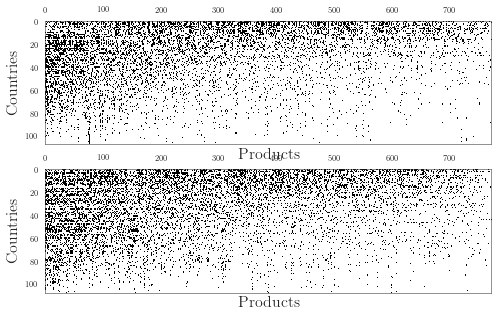

In [137]:
nmat1, ncP1, npP1 = EComm_0001_complexities.ReorderingMatrix(Mcp_widedf1)
nmat2, ncP2, npP2 = EComm_0001_complexities.ReorderingMatrix(Mcp_widedf2)

fig = plt.figure(figsize=(8,5))

ax1 = fig.add_subplot(211)
ax1.spy(nmat1, aspect='auto')
ax1.set_xlabel('Products')
ax1.set_ylabel('Countries')

ax2 = fig.add_subplot(212)
ax2.spy(nmat2, aspect='auto')
ax2.set_xlabel('Products')
ax2.set_ylabel('Countries')

plt.show()

#save2file=True
if(save2file):
    fig.savefig(path_fig + "EComm_0010_real_Mcp_matrix.{ff}".format(ff=figformat), bbox_inches='tight')

In [138]:
# Calculating the c2c and p2p matrices, eigenvalues and left-eigenvectors
(Mc2c1, Dc1, leftVc1, rightVc1) = EComm_0001_complexities.ECeigenvecs(Mcp_widedf1)
minsize1 = min(Mcp_widedf1.shape)
print(minsize1)

# Calculating the c2c and p2p matrices, eigenvalues and left-eigenvectors
(Mc2c2, Dc2, leftVc2, rightVc2) = EComm_0001_complexities.ECeigenvecs(Mcp_widedf2)
minsize2 = min(Mcp_widedf2.shape)
print(minsize2)

107
107


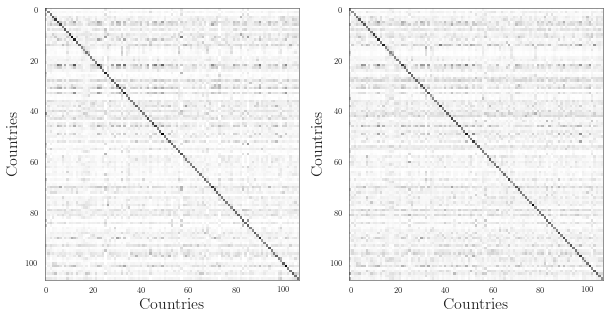

In [139]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.imshow(Mc2c1, aspect='auto', interpolation='nearest')
ax1.set_xlabel('Countries')
ax1.set_ylabel('Countries')

ax2 = fig.add_subplot(122)
ax2.imshow(Mc2c2, aspect='auto', interpolation='nearest')
ax2.set_xlabel('Countries')
ax2.set_ylabel('Countries')

plt.show()

#save2file=True
if(save2file):
    fig.savefig(path_fig + "EComm_0010_real_C_matrix.{ff}".format(ff=figformat), bbox_inches='tight')

In [140]:
communitycolumn = 'region'

# left-eigenvalue data frame
leftVc_df1 = pd.DataFrame(leftVc1, index=Mc2c1.index)
leftVc_df1['Community'] = [ctyregs_df[ctyregs_df['alpha-3']==cname][communitycolumn].values[0] for cname in Mc2c1.index.values]

# right-eigenvalue data frame
rightVc_df1 = pd.DataFrame(rightVc1, index=Mc2c1.index)
rightVc_df1['Community'] = [ctyregs_df[ctyregs_df['alpha-3']==cname][communitycolumn].values[0] for cname in Mc2c1.index.values]

# left-eigenvalue data frame
leftVc_df2 = pd.DataFrame(leftVc2, index=Mc2c2.index)
leftVc_df2['Community'] = [ctyregs_df[ctyregs_df['alpha-3']==cname][communitycolumn].values[0] for cname in Mc2c2.index.values]

# right-eigenvalue data frame
rightVc_df2 = pd.DataFrame(rightVc2, index=Mc2c2.index)
rightVc_df2['Community'] = [ctyregs_df[ctyregs_df['alpha-3']==cname][communitycolumn].values[0] for cname in Mc2c2.index.values]



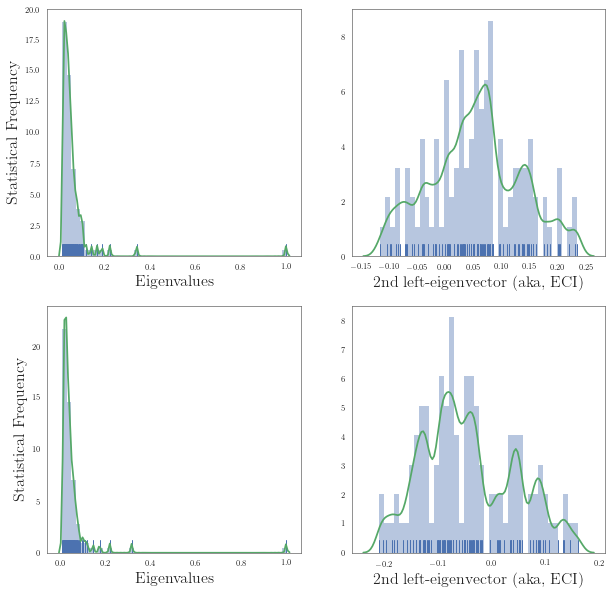

In [141]:
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

ax1 = fig.add_subplot(2,2,1)
# histogram of country eigenvalues
sns.distplot(Dc1.real, bins=50, rug=True, kde=False, norm_hist=True, ax=ax1, axlabel="Eigenvalues")
sns.kdeplot(Dc1.real, bw=.005, ax=ax1)
ax1.set_ylabel("Statistical Frequency")

ax2 = fig.add_subplot(2,2,2)
# histogram of country ECI's
sns.distplot(leftVc1[:,1], bins=40, rug=True, kde=False, norm_hist=True, ax=ax2, axlabel="2nd left-eigenvector (aka, ECI)")
sns.kdeplot(leftVc1[:,1], bw=.01, ax=ax2)

ax3 = fig.add_subplot(2,2,3)
# histogram of country eigenvalues
sns.distplot(Dc2.real, bins=50, rug=True, kde=False, norm_hist=True, ax=ax3, axlabel="Eigenvalues")
sns.kdeplot(Dc2.real, bw=.005, ax=ax3)
ax3.set_ylabel("Statistical Frequency")

ax4 = fig.add_subplot(2,2,4)
# histogram of country ECI's
sns.distplot(leftVc2[:,1], bins=40, rug=True, kde=False, norm_hist=True, ax=ax4, axlabel="2nd left-eigenvector (aka, ECI)")
sns.kdeplot(leftVc2[:,1], bw=.01, ax=ax4)
plt.show()

#save2file=True
if(save2file):
    fig.savefig(path_fig + "EComm_0010_real_Frequencies.{ff}".format(ff=figformat), bbox_inches='tight')

In [142]:
print("The number of clusters in {} is: {}".format(year1, np.sum(Dc1.real>0.25)))
print("The number of clusters in {} is: {}".format(year2, np.sum(Dc2.real>0.25)))

print("The average number of clusters in {} is: {}".format(year1, np.mean(Dc1.real[Dc1.real>0.25])))
print("The average number of clusters in {} is: {}".format(year2, np.mean(Dc2.real[Dc2.real>0.25])))

The number of clusters in 1985 is: 2
The number of clusters in 2015 is: 2
The average number of clusters in 1985 is: 0.6703760322512072
The average number of clusters in 2015 is: 0.6584571591168165


In [143]:
print(-np.dot(Dc1.real, np.log(Dc1.real)))
print(-np.dot(Dc2.real, np.log(Dc2.real)))

14.7937042946
13.4995181204


In [162]:
np.log(100)

4.6051701859880918

In [144]:
realcomms = np.unique(leftVc_df1['Community'].values)
kcomm = len(realcomms)
mycolors = sns.color_palette("Set1", n_colors=kcomm, desat=.5)

communities_vec = realcomms
numcommunities = len(communities_vec)
rncomm = np.arange(numcommunities)
mycolors = sns.color_palette("Set1", n_colors=numcommunities, desat=.5)

(communities_vec, numcommunities, rncomm)


(array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object),
 5,
 array([0, 1, 2, 3, 4]))

In [145]:
cty_marker_sizes1 = (Mcp_widedf1.sum(axis=1).values/(0.9*np.min(Mcp_widedf1.sum(axis=1).values)))**0.8
print((np.min(cty_marker_sizes1), np.max(cty_marker_sizes1)))

cty_marker_sizes2 = (Mcp_widedf2.sum(axis=1).values/(0.6*np.min(Mcp_widedf2.sum(axis=1).values)))**1.0
print((np.min(cty_marker_sizes2), np.max(cty_marker_sizes2)))

cty_marker_sizes = (cty_marker_sizes1 + cty_marker_sizes2)/2.0
print((np.min(cty_marker_sizes), np.max(cty_marker_sizes)))

(1.0879426248455297, 43.830742349781502)
(1.6666666666666665, 80.714285714285708)
(1.377304645756098, 62.272514032033605)


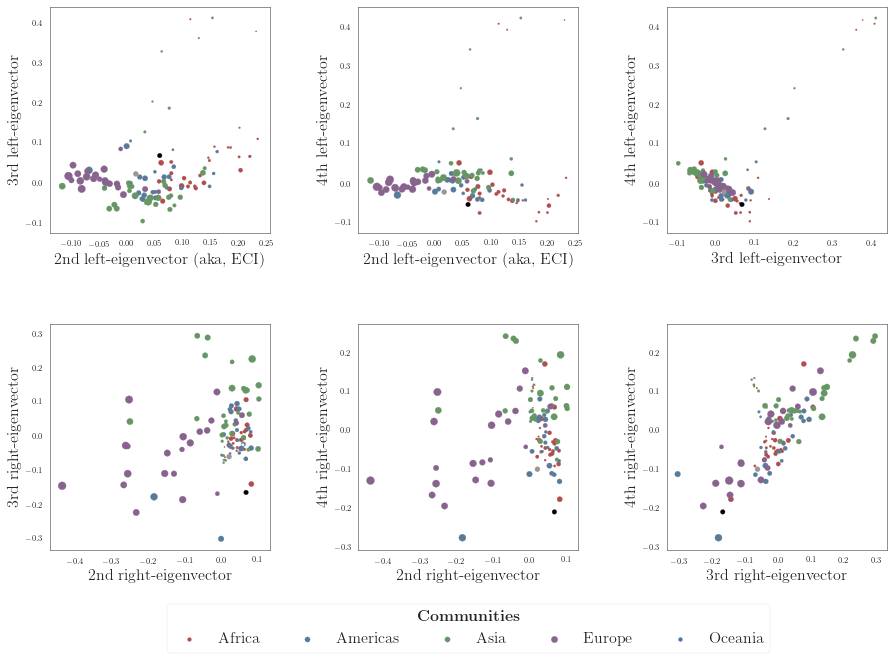

In [146]:
fig = plt.figure(figsize=(15,10))

#ax1 = fig.add_subplot(131)
#ax2 = fig.add_subplot(132)
#ax3 = fig.add_subplot(133)


#########################################################################
# FIRST ROW: LEFT-EIGENVECTORS
ax1 = fig.add_subplot(2,3,1)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax1.scatter(leftVc_df1[leftVc_df1.Community==target_name][1], leftVc_df1[leftVc_df1.Community==target_name][2],
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df1.Community==target_name])
ax1.set_xlabel('2nd left-eigenvector (aka, ECI)', fontsize=16)
ax1.set_ylabel('3rd left-eigenvector', fontsize=16)
#plt.legend(loc="best", shadow=False, scatterpoints=1)

ax2 = fig.add_subplot(2,3,2)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax2.scatter(leftVc_df1[leftVc_df1.Community==target_name][1], leftVc_df1[leftVc_df1.Community==target_name][3],
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df1.Community==target_name])
ax2.set_xlabel('2nd left-eigenvector (aka, ECI)', fontsize=16)
ax2.set_ylabel('4th left-eigenvector', fontsize=16)
#plt.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=5)

ax3 = fig.add_subplot(2,3,3)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax3.scatter(leftVc_df1[leftVc_df1.Community==target_name][2], leftVc_df1[leftVc_df1.Community==target_name][3],
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df1.Community==target_name])
ax3.set_xlabel('3rd left-eigenvector', fontsize=16)
ax3.set_ylabel('4th left-eigenvector', fontsize=16)
#plt.legend(loc="center left", shadow=False, scatterpoints=1, bbox_to_anchor=(1.1, 0.5))



#########################################################################
# SECOND ROW: RIGHT-EIGENVECTORS
ax4 = fig.add_subplot(2,3,4)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax4.scatter(rightVc_df1[rightVc_df1.Community==target_name][1], -rightVc_df1[rightVc_df1.Community==target_name][2],
                c=color, label=target_name, 
                s=cty_marker_sizes[rightVc_df1.Community==target_name])
ax4.set_xlabel('2nd right-eigenvector', fontsize=16)
ax4.set_ylabel('3rd right-eigenvector', fontsize=16)
#plt.legend(loc="best", shadow=False, scatterpoints=1)

ax5 = fig.add_subplot(2,3,5)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax5.scatter(rightVc_df1[rightVc_df1.Community==target_name][1], rightVc_df1[rightVc_df1.Community==target_name][3],
                c=color, label=target_name, 
                s=cty_marker_sizes[rightVc_df1.Community==target_name])
ax5.set_xlabel('2nd right-eigenvector', fontsize=16)
ax5.set_ylabel('4th right-eigenvector', fontsize=16)

# LEGEND
ax5legend = ax5.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=6,
          title=r'$\bf{Communities}$', fontsize=16, frameon=True, fancybox=True, markerscale=1)
plt.setp(ax5legend.get_title(),fontsize=16)

ax6 = fig.add_subplot(2,3,6)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax6.scatter(-rightVc_df1[rightVc_df1.Community==target_name][2], rightVc_df1[rightVc_df1.Community==target_name][3],
                c=color, label=target_name, 
                s=cty_marker_sizes[rightVc_df1.Community==target_name])
ax6.set_xlabel('3rd right-eigenvector', fontsize=16)
ax6.set_ylabel('4th right-eigenvector', fontsize=16)





plt.subplots_adjust(wspace=0.4, hspace=0.4)

#plt.axis([-2, 3, -3, 3])
plt.show()

#save2file=True
if(save2file):
    fig.savefig(path_fig + "EComm_0010_real_eigenvectors.{ff}".format(ff=figformat), bbox_inches='tight')

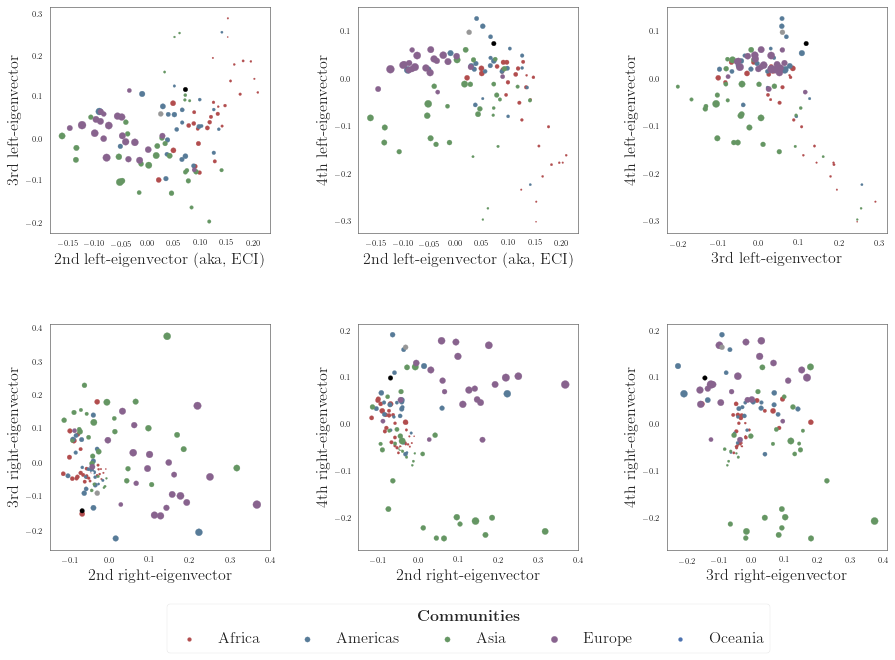

In [147]:
fig = plt.figure(figsize=(15,10))

#ax1 = fig.add_subplot(131)
#ax2 = fig.add_subplot(132)
#ax3 = fig.add_subplot(133)


#########################################################################
# FIRST ROW: LEFT-EIGENVECTORS
ax1 = fig.add_subplot(2,3,1)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax1.scatter(-leftVc_df2[leftVc_df2.Community==target_name][1], leftVc_df2[leftVc_df2.Community==target_name][2],
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df2.Community==target_name])
ax1.set_xlabel('2nd left-eigenvector (aka, ECI)', fontsize=16)
ax1.set_ylabel('3rd left-eigenvector', fontsize=16)
#plt.legend(loc="best", shadow=False, scatterpoints=1)

ax2 = fig.add_subplot(2,3,2)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax2.scatter(-leftVc_df2[leftVc_df2.Community==target_name][1], -leftVc_df2[leftVc_df2.Community==target_name][3],
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df2.Community==target_name])
ax2.set_xlabel('2nd left-eigenvector (aka, ECI)', fontsize=16)
ax2.set_ylabel('4th left-eigenvector', fontsize=16)
#plt.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=5)

ax3 = fig.add_subplot(2,3,3)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax3.scatter(leftVc_df2[leftVc_df2.Community==target_name][2], -leftVc_df2[leftVc_df2.Community==target_name][3],
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df2.Community==target_name])
ax3.set_xlabel('3rd left-eigenvector', fontsize=16)
ax3.set_ylabel('4th left-eigenvector', fontsize=16)
#plt.legend(loc="center left", shadow=False, scatterpoints=1, bbox_to_anchor=(1.1, 0.5))



#########################################################################
# SECOND ROW: RIGHT-EIGENVECTORS
ax4 = fig.add_subplot(2,3,4)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax4.scatter(rightVc_df2[rightVc_df2.Community==target_name][1], -rightVc_df2[rightVc_df2.Community==target_name][2],
                c=color, label=target_name, 
                s=cty_marker_sizes[rightVc_df2.Community==target_name])
ax4.set_xlabel('2nd right-eigenvector', fontsize=16)
ax4.set_ylabel('3rd right-eigenvector', fontsize=16)
#plt.legend(loc="best", shadow=False, scatterpoints=1)

ax5 = fig.add_subplot(2,3,5)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax5.scatter(rightVc_df2[rightVc_df2.Community==target_name][1], -rightVc_df2[rightVc_df2.Community==target_name][3],
                c=color, label=target_name, 
                s=cty_marker_sizes[rightVc_df2.Community==target_name])
ax5.set_xlabel('2nd right-eigenvector', fontsize=16)
ax5.set_ylabel('4th right-eigenvector', fontsize=16)

# LEGEND
ax5legend = ax5.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=6,
          title=r'$\bf{Communities}$', fontsize=16, frameon=True, fancybox=True, markerscale=1)
plt.setp(ax5legend.get_title(),fontsize=16)

ax6 = fig.add_subplot(2,3,6)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax6.scatter(-rightVc_df2[rightVc_df2.Community==target_name][2], -rightVc_df2[rightVc_df2.Community==target_name][3],
                c=color, label=target_name, 
                s=cty_marker_sizes[rightVc_df2.Community==target_name])
ax6.set_xlabel('3rd right-eigenvector', fontsize=16)
ax6.set_ylabel('4th right-eigenvector', fontsize=16)





plt.subplots_adjust(wspace=0.4, hspace=0.4)

#plt.axis([-2, 3, -3, 3])
plt.show()

#save2file=True
if(save2file):
    fig.savefig(path_fig + "EComm_0010_real_eigenvectors.{ff}".format(ff=figformat), bbox_inches='tight')

### Principal Component Analysis on the Mcp

In [148]:
pca = PCA(n_components = 5, whiten = True)
X_pca = pca.fit_transform(Mcp_widedf1)

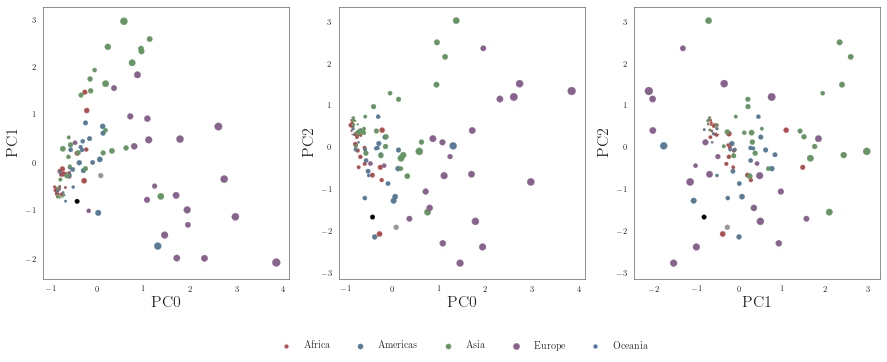

In [149]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,3,1)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax1.scatter(X_pca[leftVc_df1.Community==target_name, 0], X_pca[leftVc_df1.Community==target_name, 1],
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df1.Community==target_name])
ax1.set_xlabel('PC0', fontsize=16)
ax1.set_ylabel('PC1', fontsize=16)
#plt.legend(loc="best", shadow=False, scatterpoints=1)

ax2 = fig.add_subplot(1,3,2)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax2.scatter(X_pca[leftVc_df1.Community==target_name, 0], X_pca[leftVc_df1.Community==target_name, 2],
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df1.Community==target_name])
ax2.set_xlabel('PC0', fontsize=16)
ax2.set_ylabel('PC2', fontsize=16)
plt.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=5)

ax3 = fig.add_subplot(1,3,3)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax3.scatter(X_pca[leftVc_df1.Community==target_name, 1], X_pca[leftVc_df1.Community==target_name, 2],
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df1.Community==target_name])
ax3.set_xlabel('PC1', fontsize=16)
ax3.set_ylabel('PC2', fontsize=16)
#plt.legend(loc="center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.05), ncol=5)


#plt.axis([-2, 3, -3, 3])
plt.show()

# Testing whether distance and angle are predictive of total export growth

In [163]:
collapseddf = longdf[((longdf[colvarstring].isin(sharedprods)) &
                     (longdf[rowvarstring].isin(sharedctys)))].groupby(['year', 'exporter'])['export_value'].sum().reset_index().pivot(index='exporter', columns='year', values='export_value').fillna(0.0)
print(collapseddf.shape)
collapseddf.head()

(107, 2)


year              1985          2015
exporter                            
AGO       1.992545e+09  3.449194e+10
ALB       1.452350e+08  2.086503e+09
ARE       1.365903e+10  3.563916e+11
ARG       8.494988e+09  5.886232e+10
AUS       2.476065e+10  1.862556e+11

In [164]:
#collapseddf['growth'] = (collapseddf[str(year2)] - collapseddf[str(year1)])/collapseddf[str(year1)]
#collapseddf['growth'] = np.log(collapseddf[str(year2)]/collapseddf[str(year1)])
collapseddf['growth'] = (1.0 + (collapseddf[str(year2)] - collapseddf[str(year1)])/collapseddf[str(year1)])**(1.0/(year2-year1))-1.0
collapseddf.head()

year              1985          2015    growth
exporter                                      
AGO       1.992545e+09  3.449194e+10  0.099707
ALB       1.452350e+08  2.086503e+09  0.092895
ARE       1.365903e+10  3.563916e+11  0.114851
ARG       8.494988e+09  5.886232e+10  0.066651
AUS       2.476065e+10  1.862556e+11  0.069576

In [165]:
kk = 3

In [166]:
# 1) distance to the origin in the right-eigenspace
ddf = EComm_0001_complexities.distance_to_center(Mcp_widedf1, kcomm=kk)
mostcomplexix = ddf.sort_values(by=["dist"], ascending=False).index[0]
print(mostcomplexix)

# 2) CosineSimilarity to most distant (1) country in left-eigenspace
sims = EComm_0001_complexities.cosine_angle_to_target(Mcp_widedf1, mostcomplexix, kcomm=kk)

# 3) distance to the most distant (1) country in the right-eigenspace
d2t = EComm_0001_complexities.distance_to_target(Mcp_widedf1, mostcomplexix, kcomm=kk, space='right')

The number of clusters identified are: 3
The number of clusters chosen: 3
DEU
The number of clusters identified are: 3
The number of clusters chosen: 3
The number of clusters identified are: 3
The number of clusters chosen: 3


In [167]:
newdf = collapseddf.join(ddf).join(sims).join(d2t)
newdf.columns = ['TotalExports{}'.format(year1), 'TotalExports{}'.format(year2), 'GrowthRate', 'Distance2Origin', 'SimDirection2MostComplex', 'Distance2MostComplex']
#newdf['logGrowthRate'] = np.log(newdf.GrowthRate)
newdf['logExports{}'.format(year1)] = np.log(newdf['TotalExports{}'.format(year1)])
newdf['logExports{}'.format(year2)] = np.log(newdf['TotalExports{}'.format(year2)])
newdf.head()

TotalExports1985  TotalExports2015  GrowthRate  Distance2Origin  \
exporter                                                                    
AGO           1.992545e+09      3.449194e+10    0.099707         0.677477   
ALB           1.452350e+08      2.086503e+09    0.092895         0.769857   
ARE           1.365903e+10      3.563916e+11    0.114851         1.185734   
ARG           8.494988e+09      5.886232e+10    0.066651         1.804588   
AUS           2.476065e+10      1.862556e+11    0.069576         2.893747   

          SimDirection2MostComplex  Distance2MostComplex  logExports1985  \
exporter                                                                   
AGO                      -0.336930              0.567789       21.412678   
ALB                      -0.975378              0.578896       18.793863   
ARE                      -0.128982              0.571829       23.337666   
ARG                      -0.805341              0.563995       22.862741   
AUS                      -0.407632              0.548054       23.932522   

          logExports2015  
exporter                  
AGO            24.263992  
ALB            21.458755  
ARE            26.599297  
ARG            24.798468  
AUS            25.950386

In [168]:
newdf.describe()

TotalExports1985  TotalExports2015  GrowthRate  Distance2Origin  \
count      1.070000e+02      1.070000e+02  107.000000       107.000000   
mean       1.567962e+10      1.421233e+11    0.078788         1.611381   
std        3.461228e+10      3.117273e+11    0.042187         1.073565   
min        4.463461e+06      6.938308e+08   -0.015236         0.285964   
25%        8.336743e+08      5.900926e+09    0.059650         0.856023   
50%        3.027735e+09      3.350062e+10    0.073863         1.247229   
75%        1.381997e+10      1.470832e+11    0.094308         2.028681   
max        2.097774e+11      2.367136e+12    0.302202         5.530092   

       SimDirection2MostComplex  Distance2MostComplex  logExports1985  \
count                107.000000            107.000000      107.000000   
mean                  -0.362226              0.535901       21.856909   
std                    0.692543              0.117535        1.996595   
min                   -0.979792              0.000000       15.311435   
25%                   -0.889495              0.541050       20.541084   
50%                   -0.712076              0.566541       21.831081   
75%                   -0.058624              0.588651       23.349312   
max                    1.000000              0.730456       26.069313   

       logExports2015  
count      107.000000  
mean        24.110415  
std          1.911530  
min         20.357738  
25%         22.497998  
50%         24.234829  
75%         25.714257  
max         28.492702

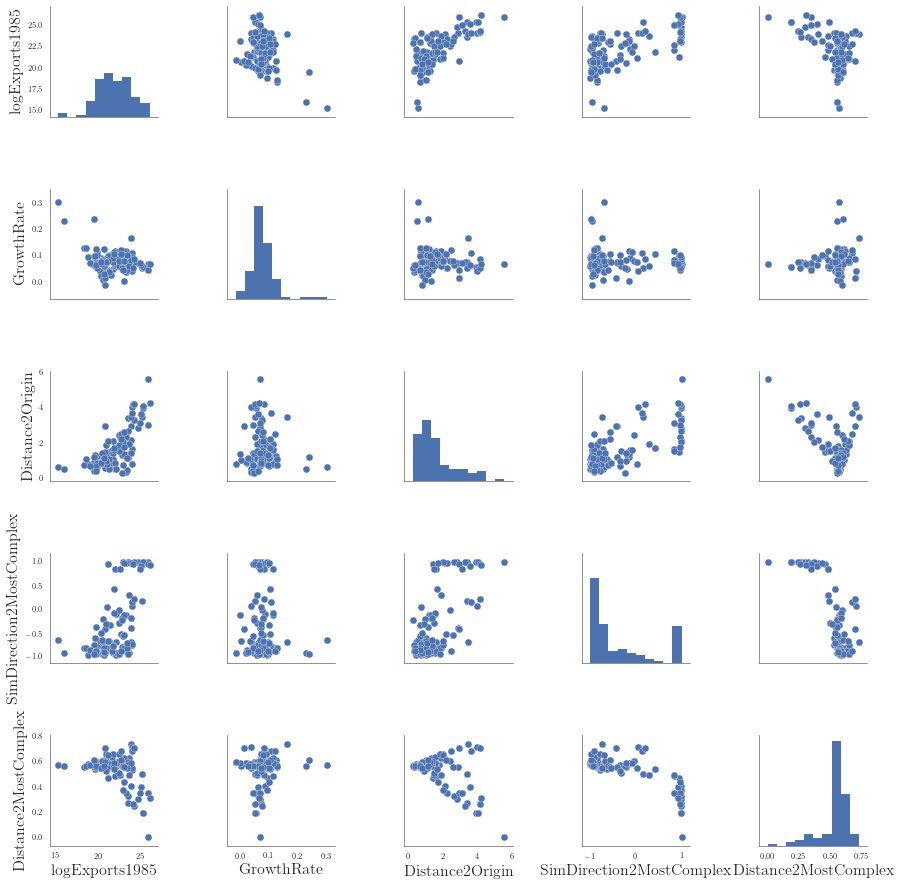

In [169]:
sns.pairplot(newdf[['logExports{}'.format(year1), 'GrowthRate', 'Distance2Origin', 'SimDirection2MostComplex', 'Distance2MostComplex']])
plt.show()

In [179]:
results_growth = smf.ols('GrowthRate ~ logExports{} + Distance2Origin'.format(year1), data=newdf).fit()
results_level = smf.ols('logExports{} ~ Distance2Origin'.format(year1), data=newdf).fit()

In [180]:
print(results_growth.summary())

                            OLS Regression Results                            
Dep. Variable:             GrowthRate   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     13.20
Date:                Wed, 07 Feb 2018   Prob (F-statistic):           7.77e-06
Time:                        12:01:51   Log-Likelihood:                 199.51
No. Observations:                 107   AIC:                            -393.0
Df Residuals:                     104   BIC:                            -385.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3434      0.052     

In [181]:
print(results_level.summary())

                            OLS Regression Results                            
Dep. Variable:         logExports1985   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     101.7
Date:                Wed, 07 Feb 2018   Prob (F-statistic):           3.95e-17
Time:                        12:02:02   Log-Likelihood:                -189.07
No. Observations:                 107   AIC:                             382.1
Df Residuals:                     105   BIC:                             387.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          19.7548      0.250     

# ANALYZING ALL YEARS ALL COUNTRIES

In [12]:
longdf.head()

year exporter commoditycode  inatlas  export_value  population  rca  rpop  \
0  1962      AFG          0011        0           0.0   9345868.0  0.0   0.0   
1  1962      AFG          0012        0           0.0   9345868.0  0.0   0.0   
2  1962      AFG          0013        0           0.0   9345868.0  0.0   0.0   
3  1962      AFG          0014        0           0.0   9345868.0  0.0   0.0   
4  1962      AFG          0015        0           0.0   9345868.0  0.0   0.0   

   mcp       eci       pci    oppval   oppgain  distance  import_value  
0  0.0 -0.673163 -0.771008 -0.707317 -0.441255  0.921664           0.0  
1  0.0 -0.673163 -0.794975 -0.707317 -0.394031  0.897102           0.0  
2  0.0 -0.673163  0.541602 -0.707317 -0.001801  0.957307           0.0  
3  0.0 -0.673163  0.450024 -0.707317  0.203735  0.968188           0.0  
4  0.0 -0.673163  1.035989 -0.707317  0.346988  0.963633           0.0

In [19]:
rowvarstring = 'year'
colvarstring = 'commoditycode'
valvarstring = 'mcp'
year = 2015

## Converting long to wide

In [54]:
# ---------------------
# From long to wide format
Mcp_widedf = longdf[(longdf['exporter']=='BRA')][[rowvarstring, colvarstring, valvarstring]].pivot(index=rowvarstring, 
                                                                       columns=colvarstring, 
                                                                       values=valvarstring).fillna(0.0)

# -------------------------------------------------------------------------------------

# EXPLORING THE ECI WITH THE REAL DATA

In [55]:
kcomm = 3
mycolors = sns.color_palette("Set1", n_colors=kcomm, desat=.5)

In [56]:
# Getting rid of the rows/columns of pure zeros
Mcp_widedf = Mcp_widedf.loc[:, (Mcp_widedf != 0).any(axis=0)]
Mcp_widedf = Mcp_widedf.loc[(Mcp_widedf != 0).any(axis=1), :]
Mcp_mat = np.array(Mcp_widedf)
print(Mcp_widedf.shape)

(55, 493)


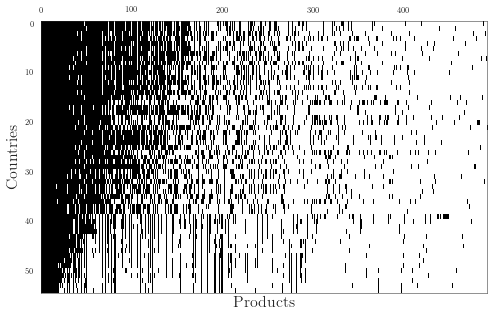

In [57]:
nmat, ncP, npP = EComm_0001_complexities.ReorderingMatrix(Mcp_widedf)

fig = plt.figure(figsize=(8,5))

ax1 = fig.add_subplot(111)
ax1.spy(nmat, aspect='auto')
ax1.set_xlabel('Products')
ax1.set_ylabel('Countries')

#ax2 = fig.add_subplot(122)
#ax2.spy(nmat, aspect='auto')
#ax2.set_xlabel('Products')
#ax2.set_ylabel('Countries')

plt.show()

#save2file=True
if(save2file):
    fig.savefig(path_fig + "EComm_0010_real_Mcp_matrix.{ff}".format(ff=figformat), bbox_inches='tight')

In [58]:
# Calculating the c2c and p2p matrices, eigenvalues and left-eigenvectors
(Mc2c, Dc, leftVc, rightVc) = EComm_0001_complexities.ECeigenvecs(Mcp_widedf)
minsize = min(Mcp_widedf.shape)
print(minsize)



55


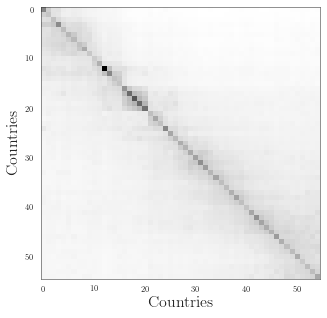

In [59]:
fig = plt.figure(figsize=(5,5))

ax1 = fig.add_subplot(111)
ax1.imshow(Mc2c, aspect='auto', interpolation='nearest')
ax1.set_xlabel('Countries')
ax1.set_ylabel('Countries')

#ax2 = fig.add_subplot(122)
#ax2.spy(nmat, aspect='auto')
#ax2.set_xlabel('Products')
#ax2.set_ylabel('Countries')

plt.show()

#save2file=True
if(save2file):
    fig.savefig(path_fig + "EComm_0010_real_C_matrix.{ff}".format(ff=figformat), bbox_inches='tight')

In [60]:
Mc2c.index.values

array([1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

In [61]:
communitycolumn = 'decade'

# left-eigenvalue data frame
leftVc_df = pd.DataFrame(leftVc, index=Mc2c.index)
leftVc_df['Community'] = [ int(cname/10.0)*10 for cname in Mc2c.index.values]

# right-eigenvalue data frame
rightVc_df = pd.DataFrame(rightVc, index=Mc2c.index)
rightVc_df['Community'] = [ int(cname/10.0)*10 for cname in Mc2c.index.values]

print(leftVc_df.head())
print(rightVc_df.head())

            0         1         2         3         4         5         6  \
year                                                                        
1962 -0.13484 -0.258115 -0.258510  0.183454  0.160840 -0.110332 -0.039289   
1963 -0.13484 -0.244257 -0.226146  0.155050  0.137584 -0.061483 -0.047731   
1964 -0.13484 -0.252163 -0.228193  0.167272  0.175914 -0.088096 -0.002941   
1965 -0.13484 -0.261893 -0.242008  0.174771  0.178691 -0.167950  0.035707   
1966 -0.13484 -0.246858 -0.190925  0.128434  0.132191 -0.037300  0.079085   

             7         8         9    ...            46        47        48  \
year                                  ...                                     
1962  0.597007  0.220979 -0.591597    ...      0.024438  0.242528 -0.141298   
1963  0.321821  0.096390 -0.302800    ...      0.002000 -0.553508  0.331617   
1964  0.149144 -0.041388 -0.041095    ...     -0.265433  0.304894 -0.335093   
1965  0.203670  0.067807 -0.036689    ...      0.225587 -0.012988

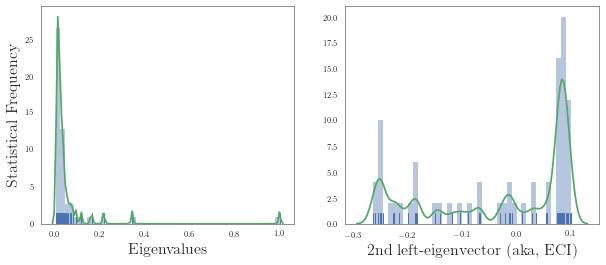

In [62]:
fig = plt.figure(figsize=(10,4))
plt.subplots_adjust(wspace=0.2)

ax1 = fig.add_subplot(1,2,1)
# histogram of country eigenvalues
sns.distplot(Dc.real, bins=50, rug=True, kde=False, norm_hist=True, ax=ax1, axlabel="Eigenvalues")
sns.kdeplot(Dc.real, bw=.005, ax=ax1)
ax1.set_ylabel("Statistical Frequency")

ax2 = fig.add_subplot(1,2,2)
# histogram of country ECI's
sns.distplot(leftVc[:,1], bins=40, rug=True, kde=False, norm_hist=True, ax=ax2, axlabel="2nd left-eigenvector (aka, ECI)")
sns.kdeplot(leftVc[:,1], bw=.01, ax=ax2)
plt.show()

#save2file=True
if(save2file):
    fig.savefig(path_fig + "EComm_0010_real_Frequencies.{ff}".format(ff=figformat), bbox_inches='tight')

In [63]:
realcomms = np.unique(leftVc_df['Community'].values)
kcomm = len(realcomms)
mycolors = sns.color_palette("Set1", n_colors=kcomm, desat=.5)

communities_vec = realcomms
numcommunities = len(communities_vec)
rncomm = np.arange(numcommunities)
mycolors = sns.color_palette("Set1", n_colors=numcommunities, desat=.5)

(communities_vec, numcommunities, rncomm)


(array([1960, 1970, 1980, 1990, 2000, 2010], dtype=int64),
 6,
 array([0, 1, 2, 3, 4, 5]))

In [64]:
cty_marker_sizes = (Mcp_widedf.sum(axis=1).values/(0.8*np.min(Mcp_widedf.sum(axis=1).values)))**3
(np.min(cty_marker_sizes), np.max(cty_marker_sizes))

(1.9531249999999989, 93.036651611328125)

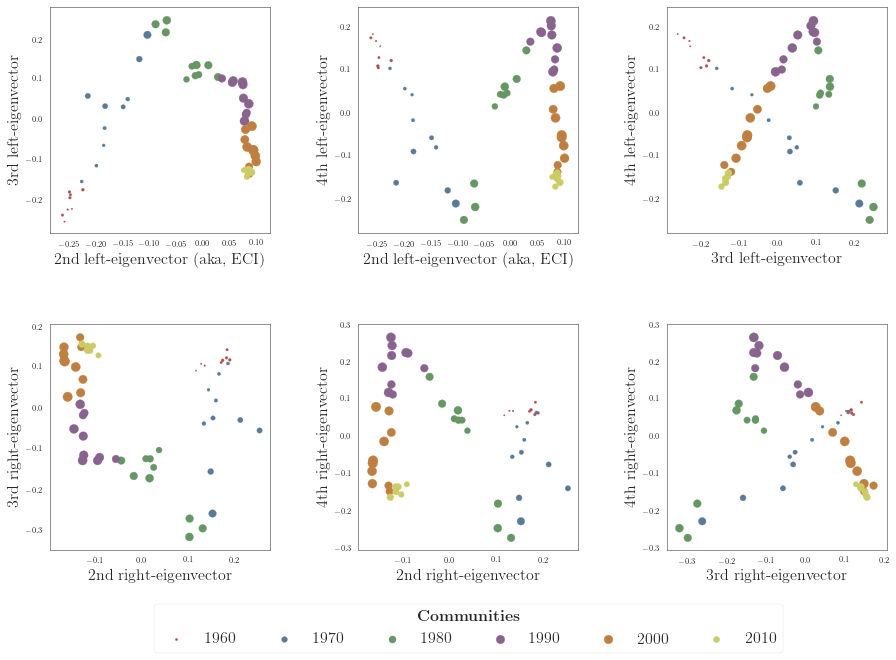

In [65]:
fig = plt.figure(figsize=(15,10))

#ax1 = fig.add_subplot(131)
#ax2 = fig.add_subplot(132)
#ax3 = fig.add_subplot(133)


#########################################################################
# FIRST ROW: LEFT-EIGENVECTORS
ax1 = fig.add_subplot(2,3,1)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax1.scatter(leftVc_df[leftVc_df.Community==target_name][1], leftVc_df[leftVc_df.Community==target_name][2],
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df.Community==target_name])
ax1.set_xlabel('2nd left-eigenvector (aka, ECI)', fontsize=16)
ax1.set_ylabel('3rd left-eigenvector', fontsize=16)
#plt.legend(loc="best", shadow=False, scatterpoints=1)

ax2 = fig.add_subplot(2,3,2)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax2.scatter(leftVc_df[leftVc_df.Community==target_name][1], leftVc_df[leftVc_df.Community==target_name][3],
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df.Community==target_name])
ax2.set_xlabel('2nd left-eigenvector (aka, ECI)', fontsize=16)
ax2.set_ylabel('4th left-eigenvector', fontsize=16)
#plt.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=5)

ax3 = fig.add_subplot(2,3,3)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax3.scatter(leftVc_df[leftVc_df.Community==target_name][2], leftVc_df[leftVc_df.Community==target_name][3],
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df.Community==target_name])
ax3.set_xlabel('3rd left-eigenvector', fontsize=16)
ax3.set_ylabel('4th left-eigenvector', fontsize=16)
#plt.legend(loc="center left", shadow=False, scatterpoints=1, bbox_to_anchor=(1.1, 0.5))



#########################################################################
# SECOND ROW: RIGHT-EIGENVECTORS
ax4 = fig.add_subplot(2,3,4)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax4.scatter(-rightVc_df[rightVc_df.Community==target_name][1], -rightVc_df[rightVc_df.Community==target_name][2],
                c=color, label=target_name, 
                s=cty_marker_sizes[rightVc_df.Community==target_name])
ax4.set_xlabel('2nd right-eigenvector', fontsize=16)
ax4.set_ylabel('3rd right-eigenvector', fontsize=16)
#plt.legend(loc="best", shadow=False, scatterpoints=1)

ax5 = fig.add_subplot(2,3,5)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax5.scatter(-rightVc_df[rightVc_df.Community==target_name][1], rightVc_df[rightVc_df.Community==target_name][3],
                c=color, label=target_name, 
                s=cty_marker_sizes[rightVc_df.Community==target_name])
ax5.set_xlabel('2nd right-eigenvector', fontsize=16)
ax5.set_ylabel('4th right-eigenvector', fontsize=16)

# LEGEND
ax5legend = ax5.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=6,
          title=r'$\bf{Communities}$', fontsize=16, frameon=True, fancybox=True, markerscale=1)
plt.setp(ax5legend.get_title(),fontsize=16)

ax6 = fig.add_subplot(2,3,6)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax6.scatter(-rightVc_df[rightVc_df.Community==target_name][2], rightVc_df[rightVc_df.Community==target_name][3],
                c=color, label=target_name, 
                s=cty_marker_sizes[rightVc_df.Community==target_name])
ax6.set_xlabel('3rd right-eigenvector', fontsize=16)
ax6.set_ylabel('4th right-eigenvector', fontsize=16)





plt.subplots_adjust(wspace=0.4, hspace=0.4)

#plt.axis([-2, 3, -3, 3])
plt.show()

#save2file=True
if(save2file):
    fig.savefig(path_fig + "EComm_0010_real_eigenvectors.{ff}".format(ff=figformat), bbox_inches='tight')